## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [2]:
raw = pd.read_csv('BankData.csv')

In [3]:
raw.head()

,Unnamed: 0,CustomerID,Age,MaritalStatus,EducationLevel,Occupation,IncomeLevel,Location,MonthlyAverageBalance,NumberOfTransactionsPerMonth,ExistingBankProducts,InvestmentHorizon
0,0,1.0,18.0,Single,Bachelor's,Student,2919.0,Rural,2919.0,12.0,Loan,Short-term
1,1,2.0,66.0,Married,High School,Retired,46672.0,Rural,46672.0,7.0,Credit Card,Mid-term
2,2,3.0,45.0,Married,Bachelor's,Salaried,186039.0,Rural,186039.0,13.0,FD,Long-term
3,3,4.0,56.0,Married,Bachelor's,Salaried,63927.0,Metro,63927.0,9.0,FD,Long-term
4,4,5.0,66.0,Married,High School,Retired,34509.0,SemiUrban,34509.0,7.0,FD,Long-term


In [4]:
raw.drop(['Unnamed: 0','CustomerID'], axis = 1, inplace= True)

## EDA

In [5]:
cat_col = [col for col in raw.columns if raw[col].dtypes == 'object']
num_col = [col for col in raw.columns if raw[col].dtypes == 'float64']

In [6]:
cat_col

['MaritalStatus',
 'EducationLevel',
 'Occupation',
 'Location',
 'ExistingBankProducts',
 'InvestmentHorizon']

In [7]:
num_col

['Age', 'IncomeLevel', 'MonthlyAverageBalance', 'NumberOfTransactionsPerMonth']

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45896 entries, 0 to 45895
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           45874 non-null  float64
 1   MaritalStatus                 45870 non-null  object 
 2   EducationLevel                45869 non-null  object 
 3   Occupation                    45873 non-null  object 
 4   IncomeLevel                   45869 non-null  float64
 5   Location                      45874 non-null  object 
 6   MonthlyAverageBalance         45868 non-null  float64
 7   NumberOfTransactionsPerMonth  45872 non-null  float64
 8   ExistingBankProducts          45873 non-null  object 
 9   InvestmentHorizon             45878 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.5+ MB


In [9]:
raw.describe(include='float64')

,Age,IncomeLevel,MonthlyAverageBalance,NumberOfTransactionsPerMonth
count,45874.000000,45869.000000,45868.000000,45872.000000
mean,45.926996,91130.796355,91150.966338,8.685167
std,16.870642,79191.739184,79340.227303,4.603427
min,18.000000,6.000000,6.000000,2.000000
25%,32.000000,33151.000000,33164.000000,5.000000
50%,46.000000,57536.000000,57535.500000,8.000000
75%,60.000000,133468.000000,133467.250000,12.000000
max,570.000000,299997.000000,934230.000000,85.000000


In [10]:
raw.describe(include='object')

,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon
count,45870,45869,45873,45874,45873,45878
unique,2,4,7,3,4,3
top,Married,Bachelor's,Salaried,Metro,FD,Long-term
freq,35147,23501,15047,15341,22978,28272


In [11]:
raw.isna().sum()

Age                             22
MaritalStatus                   26
EducationLevel                  27
Occupation                      23
IncomeLevel                     27
Location                        22
MonthlyAverageBalance           28
NumberOfTransactionsPerMonth    24
ExistingBankProducts            23
InvestmentHorizon               18
dtype: int64

In [12]:
raw.duplicated().sum()

1

In [13]:
for col in cat_col:
    print(f'Column \'{col}\' Contains Following unique values:\n {raw[col].unique()}')
    print('---'*30)
    print()

Column 'MaritalStatus' Contains Following unique values:
 ['Single' 'Married' nan]
------------------------------------------------------------------------------------------

Column 'EducationLevel' Contains Following unique values:
 ["Bachelor's" 'High School' "Master's" 'PhD' nan]
------------------------------------------------------------------------------------------

Column 'Occupation' Contains Following unique values:
 ['Student' 'Retired' 'Salaried' 'Self-Employed' 'Business' 'Homemaker'
 'Others' nan]
------------------------------------------------------------------------------------------

Column 'Location' Contains Following unique values:
 ['Rural' 'Metro' 'SemiUrban' nan]
------------------------------------------------------------------------------------------

Column 'ExistingBankProducts' Contains Following unique values:
 ['Loan' 'Credit Card' 'FD' 'SIP' nan]
------------------------------------------------------------------------------------------

Column 'Investmen

In [14]:
for col in cat_col:
    print(raw[col].value_counts())
    print('---'*30)

MaritalStatus
Married    35147
Single     10723
Name: count, dtype: int64
------------------------------------------------------------------------------------------
EducationLevel
Bachelor's     23501
High School    11423
Master's        9377
PhD             1568
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Occupation
Salaried         15047
Retired          12033
Homemaker         4432
Business          4423
Student           4029
Self-Employed     3011
Others            2898
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Location
Metro        15341
SemiUrban    15274
Rural        15259
Name: count, dtype: int64
------------------------------------------------------------------------------------------
ExistingBankProducts
FD             22978
SIP            10475
Loan            6782
Credit Card     5638
Name: count, dtype: int64
----------------

## Dropping Duplicates

In [15]:
raw.duplicated().sum()

1

In [16]:
raw.drop_duplicates(inplace=True)

## Outlies Handling

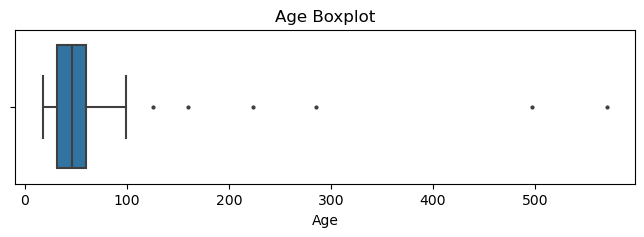

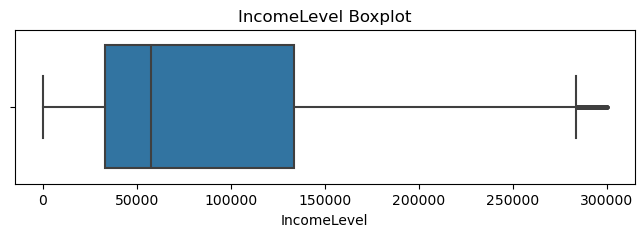

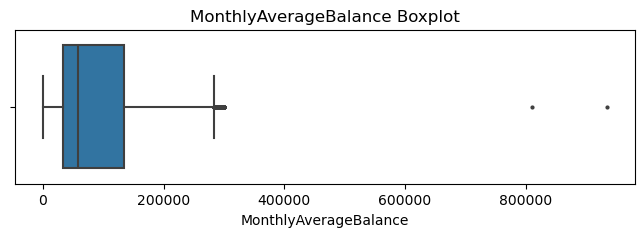

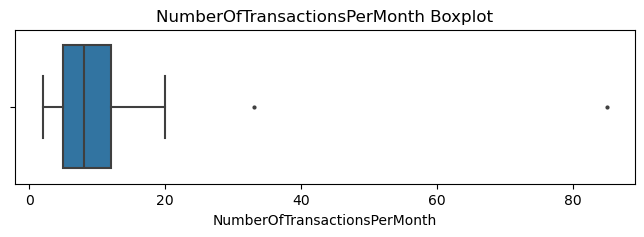

In [17]:
for col in num_col:
    plt.figure(figsize=(8,2))  # Adjusted figsize for better visualization
    sns.boxplot(x=raw[col], flierprops={'marker': 'o', 'markersize': 2})  # Using seaborn for boxplot
    plt.title(f'{col} Boxplot')
    plt.show()

In [18]:
outliers = {}
for col in num_col:
    
    a = raw[col].quantile(0.25)
    b = raw[col].quantile(0.75)
    
    iqr = b - a
    
    upper_limit = b + 1.5 * iqr
    lower_limit = a - 1.5 * iqr
    
    outlier_indices = raw.loc[(raw[col] > upper_limit) | (raw[col] < lower_limit)].index
    outliers[col] = outlier_indices

outliers

{'Age': Index([227, 3073, 8855, 15702, 38115, 45642], dtype='int64'),
 'IncomeLevel': Index([   22,    35,    57,    85,    90,   115,   231,   250,   355,   401,
        ...
        45601, 45612, 45654, 45722, 45726, 45786, 45799, 45828, 45858, 45872],
       dtype='int64', length=1002),
 'MonthlyAverageBalance': Index([   22,    35,    57,    85,    90,   115,   231,   250,   355,   401,
        ...
        45601, 45612, 45654, 45722, 45726, 45786, 45799, 45828, 45858, 45872],
       dtype='int64', length=1003),
 'NumberOfTransactionsPerMonth': Index([1951, 42564], dtype='int64')}

In [19]:
raw['Age'] = np.where(raw['Age'] > 90, raw['Age'].median(), raw['Age'])

In [20]:
a = raw['IncomeLevel'].quantile(0.25)
b = raw['IncomeLevel'].quantile(0.75)

iqr = b - a

upper_limit = b + (2.5 * iqr)

raw.loc[raw['IncomeLevel'] > upper_limit, 'IncomeLevel'] = upper_limit
upper_limit

384268.25

In [21]:
a = raw['MonthlyAverageBalance'].quantile(0.25)
b = raw['MonthlyAverageBalance'].quantile(0.75)

iqr = b - a

upper_limit = b + (2.5 * iqr)

raw.loc[raw['MonthlyAverageBalance'] > upper_limit, 'MonthlyAverageBalance'] = upper_limit
upper_limit

384221.25

In [22]:
a = raw['NumberOfTransactionsPerMonth'].quantile(0.25)
b = raw['NumberOfTransactionsPerMonth'].quantile(0.75)

iqr = b - a

upper_limit = b + (3 * iqr)

raw.loc[raw['NumberOfTransactionsPerMonth'] > upper_limit, 'NumberOfTransactionsPerMonth'] = upper_limit
upper_limit

33.0

## Handling Missing Values

In [23]:
imputer = KNNImputer(n_neighbors=7)
si= SimpleImputer(strategy='most_frequent')

In [24]:
num_imputed = pd.DataFrame(imputer.fit_transform(raw[num_col]), columns=num_col)
num_imputed.isna().sum()

Age                             0
IncomeLevel                     0
MonthlyAverageBalance           0
NumberOfTransactionsPerMonth    0
dtype: int64

In [25]:
cat_imputed = pd.DataFrame(si.fit_transform(raw[cat_col]), columns=cat_col)
cat_imputed.isna().sum()

MaritalStatus           0
EducationLevel          0
Occupation              0
Location                0
ExistingBankProducts    0
InvestmentHorizon       0
dtype: int64

In [26]:
imputed_df = pd.concat([cat_imputed, num_imputed], axis=1)
imputed_df.head()

,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon,Age,IncomeLevel,MonthlyAverageBalance,NumberOfTransactionsPerMonth
0,Single,Bachelor's,Student,Rural,Loan,Short-term,18.0,2919.0,2919.0,12.0
1,Married,High School,Retired,Rural,Credit Card,Mid-term,66.0,46672.0,46672.0,7.0
2,Married,Bachelor's,Salaried,Rural,FD,Long-term,45.0,186039.0,186039.0,13.0
3,Married,Bachelor's,Salaried,Metro,FD,Long-term,56.0,63927.0,63927.0,9.0
4,Married,High School,Retired,SemiUrban,FD,Long-term,66.0,34509.0,34509.0,7.0


## Encoding the Categorical Variables

In [27]:
oe = OrdinalEncoder(
    categories=[
        ['Married', 'Single'],  # MaritalStatus categories
        ["Bachelor's", "High School", "Master's", 'PhD'],  # EducationLevel order
        ['Salaried', 'Retired', 'Homemaker', 'Business', 'Student', 'Self-Employed', 'Others'],  # Occupation categories
        ['Metro', 'SemiUrban', 'Rural'],  # Location categories
        ['FD', 'SIP', 'Loan', 'Credit Card'], # ExistingBankProducts categories        
        ['Long-term', 'Mid-term', 'Short-term'] # InvestmentHorizon order
    ],
    handle_unknown='use_encoded_value',
    unknown_value=-1,  # A specific value for unknown categories
    dtype=int
)

In [28]:
cat_col_trf = pd.DataFrame(oe.fit_transform(imputed_df[cat_col]), columns=cat_col)
cat_col_trf

,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon
0,1,0,4,2,2,2
1,0,1,1,2,3,1
2,0,0,0,2,0,0
3,0,0,0,0,0,0
4,0,1,1,1,0,0
...,...,...,...,...,...,...
45890,0,3,0,2,0,0
45891,0,0,0,2,1,0
45892,1,0,4,2,3,1
45893,1,2,0,0,1,1


In [29]:
df1 = imputed_df.copy()

In [30]:
df1.drop(cat_col, axis=1, inplace=True)
df2 = pd.concat([df1, cat_col_trf], axis=1)
df2.head(10)

,Age,IncomeLevel,MonthlyAverageBalance,NumberOfTransactionsPerMonth,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon
0,18.0,2919.0,2919.0,12.0,1,0,4,2,2,2
1,66.0,46672.0,46672.0,7.0,0,1,1,2,3,1
2,45.0,186039.0,186039.0,13.0,0,0,0,2,0,0
3,56.0,63927.0,63927.0,9.0,0,0,0,0,0,0
4,66.0,34509.0,34509.0,7.0,0,1,1,1,0,0
5,49.0,137523.0,137523.0,10.0,0,0,0,2,2,0
6,26.0,58692.0,58692.0,9.0,1,2,0,1,0,0
7,54.0,107016.0,107016.0,9.0,0,0,5,1,1,1
8,33.0,151289.0,151289.0,16.0,0,0,0,1,1,0
9,54.0,80074.0,80074.0,8.0,0,0,3,0,0,0


## Scaling the Features

In [31]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2)
df = pd.DataFrame(df_scaled, columns=df2.columns)
df.head()

,Age,IncomeLevel,MonthlyAverageBalance,NumberOfTransactionsPerMonth,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon
0,0.000000,0.009710,0.007582,0.322581,1.0,0.000000,0.666667,1.0,0.666667,1.0
1,0.695652,0.155558,0.121458,0.161290,0.0,0.333333,0.166667,1.0,1.000000,0.5
2,0.391304,0.620129,0.484190,0.354839,0.0,0.000000,0.000000,1.0,0.000000,0.0
3,0.550725,0.213076,0.166368,0.225806,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.695652,0.115013,0.089801,0.161290,0.0,0.333333,0.166667,0.5,0.000000,0.0


## With Scaling

In [32]:
sil_scores = []
wcss_list = []
davies_b_indices = []
ch_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=11)
    kmeans_model.fit(df)
    wcss_list.append(round(kmeans_model.inertia_,2))
    sil_scores.append(round(silhouette_score(df, kmeans_model.labels_),2))
    davies_b_indices.append(round(davies_bouldin_score(df, kmeans_model.labels_),2))
    ch_indices.append(round(calinski_harabasz_score(df, kmeans_model.labels_),2))

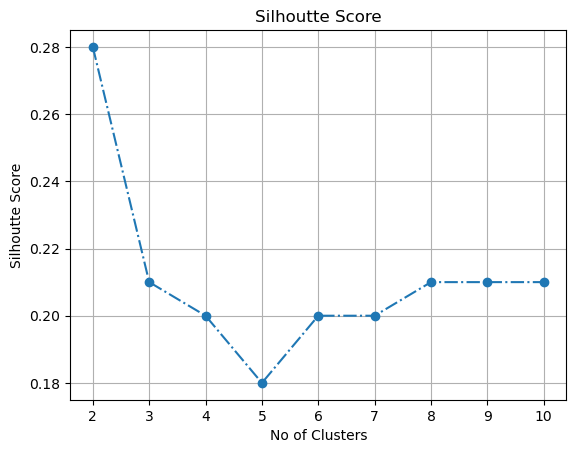

In [33]:
plt.title('Silhoutte Score')
plt.xlabel('No of Clusters')
plt.ylabel('Silhoutte Score')
plt.plot(cluster_range, sil_scores, marker = 'o', linestyle = '-.')
plt.grid(True)

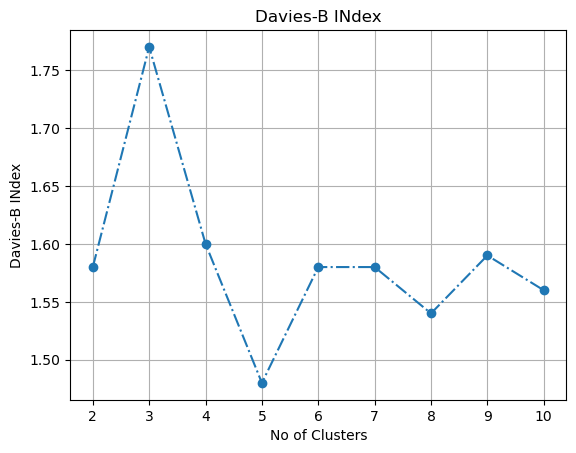

In [34]:
plt.title('Davies-B INdex')
plt.xlabel('No of Clusters')
plt.ylabel('Davies-B INdex')
plt.plot(cluster_range, davies_b_indices, marker = 'o', linestyle = '-.')
plt.grid(True)

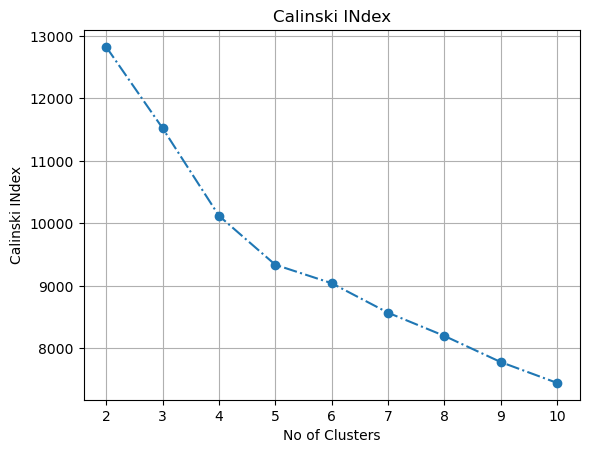

In [35]:
plt.title('Calinski INdex')
plt.xlabel('No of Clusters')
plt.ylabel('Calinski INdex')
plt.plot(cluster_range, ch_indices, marker = 'o', linestyle = '-.')
plt.grid(True)

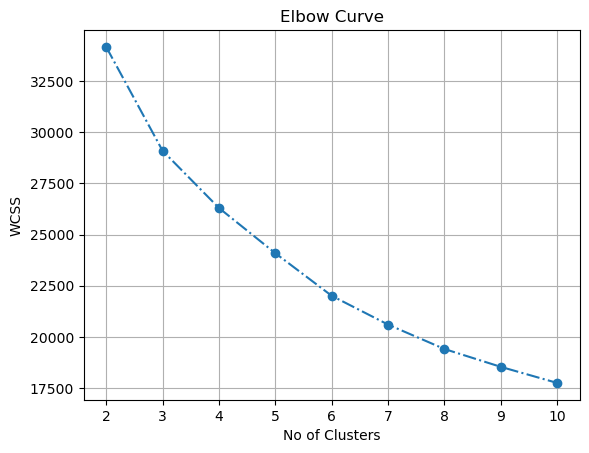

In [36]:
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.plot(cluster_range, wcss_list, marker = 'o', linestyle = '-.')
plt.grid(True)

In [37]:
cluster_results  = pd.DataFrame()
cluster_results['Cluster'] = cluster_range
cluster_results['WCSS'] = wcss_list
cluster_results['Davies-Bouldin Index'] = davies_b_indices
cluster_results['Calinski-Harabasz Index'] = ch_indices
cluster_results['Silhoutte Score'] = sil_scores
cluster_results

,Cluster,WCSS,Davies-Bouldin Index,Calinski-Harabasz Index,Silhoutte Score
0,2,34153.57,1.58,12823.95,0.28
1,3,29088.40,1.77,11523.93,0.21
2,4,26297.33,1.60,10121.37,0.20
3,5,24090.40,1.48,9337.29,0.18
4,6,22011.94,1.58,9041.58,0.20
5,7,20606.98,1.58,8569.62,0.20
6,8,19415.53,1.54,8198.24,0.21
7,9,18544.85,1.59,7779.41,0.21
8,10,17760.02,1.56,7445.73,0.21


## Without Scaling

In [38]:
sil_scores = []
wcss_list = []
davies_b_indices = []
ch_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k, random_state=11)
    kmeans_model.fit(df2)
    wcss_list.append(round(kmeans_model.inertia_,2))
    sil_scores.append(round(silhouette_score(df2, kmeans_model.labels_),2))
    davies_b_indices.append(round(davies_bouldin_score(df2, kmeans_model.labels_),2))
    ch_indices.append(round(calinski_harabasz_score(df2, kmeans_model.labels_),2))

In [39]:
cluster_results  = pd.DataFrame()
cluster_results['Cluster'] = cluster_range
cluster_results['WCSS'] = wcss_list
cluster_results['Davies-Bouldin Index'] = davies_b_indices
cluster_results['Calinski-Harabasz Index'] = ch_indices
cluster_results['Silhoutte Score'] = sil_scores
cluster_results

,Cluster,WCSS,Davies-Bouldin Index,Calinski-Harabasz Index,Silhoutte Score
0,2,1.401816e+14,0.47,142496.78,0.69
1,3,5.736771e+13,0.47,207219.99,0.65
2,4,3.655739e+13,0.50,225490.90,0.60
3,5,2.408200e+13,0.54,262671.57,0.54
4,6,1.533587e+13,0.52,335199.20,0.57
5,7,1.156468e+13,0.51,372911.58,0.57
6,8,8.605535e+12,0.49,431796.83,0.58
7,9,6.814575e+12,0.50,478617.50,0.58
8,10,5.534283e+12,0.50,525042.06,0.57


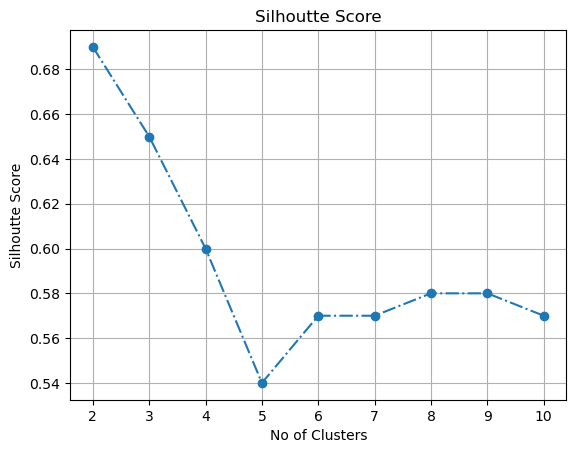

In [40]:
plt.title('Silhoutte Score')
plt.xlabel('No of Clusters')
plt.ylabel('Silhoutte Score')
plt.plot(cluster_range, sil_scores, marker = 'o', linestyle = '-.')
plt.grid(True)

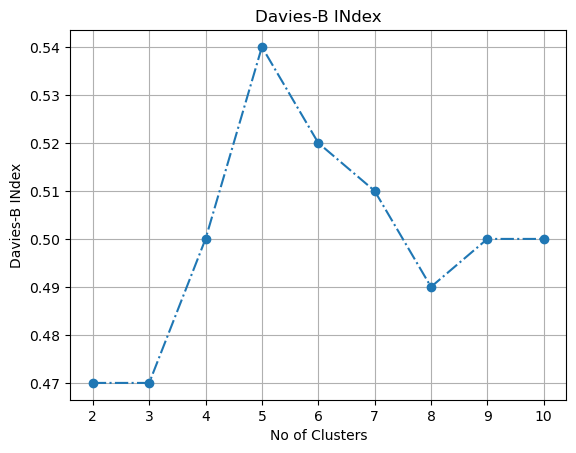

In [41]:
plt.title('Davies-B INdex')
plt.xlabel('No of Clusters')
plt.ylabel('Davies-B INdex')
plt.plot(cluster_range, davies_b_indices, marker = 'o', linestyle = '-.')
plt.grid(True)

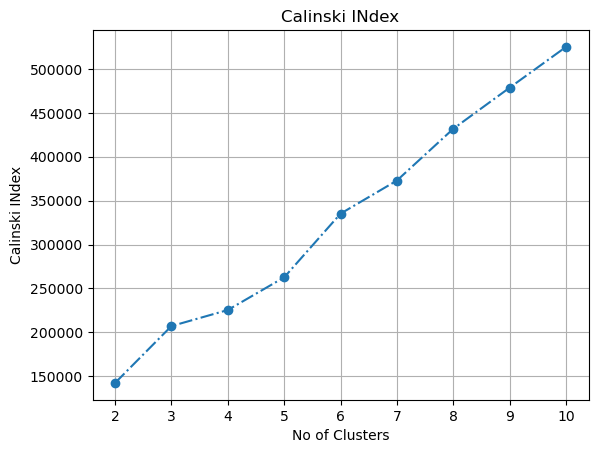

In [42]:
plt.title('Calinski INdex')
plt.xlabel('No of Clusters')
plt.ylabel('Calinski INdex')
plt.plot(cluster_range, ch_indices, marker = 'o', linestyle = '-.')
plt.grid(True)

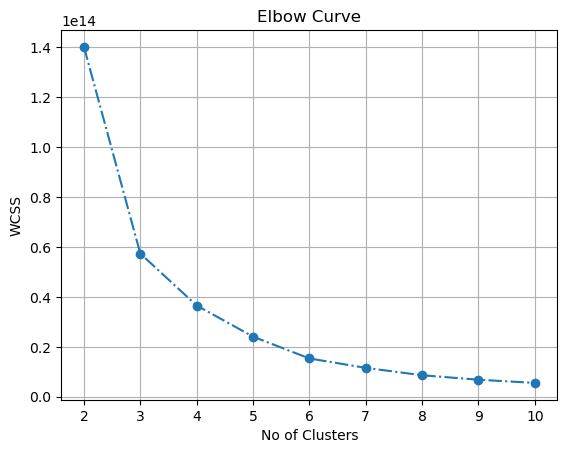

In [43]:
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.plot(cluster_range, wcss_list, marker = 'o', linestyle = '-.')
plt.grid(True)

## For K = 4

In [44]:
# Choose the optimal number of clusters
optimal_clusters = 4  

kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_model.fit(df2)
cluster_labels = kmeans_model.labels_

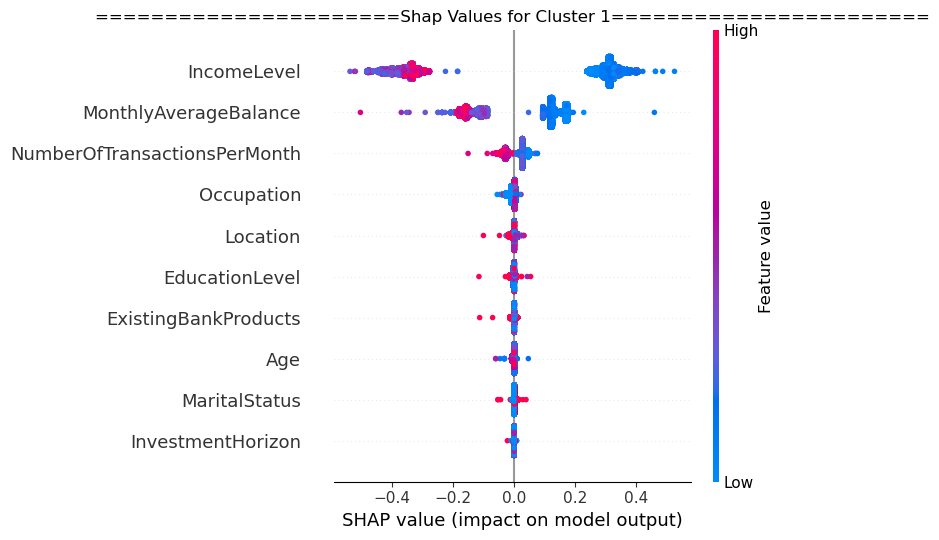

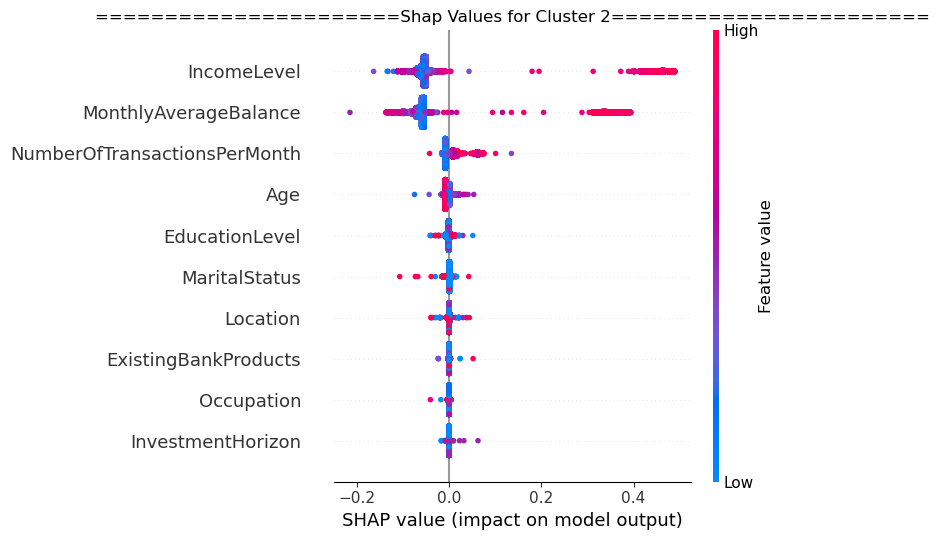

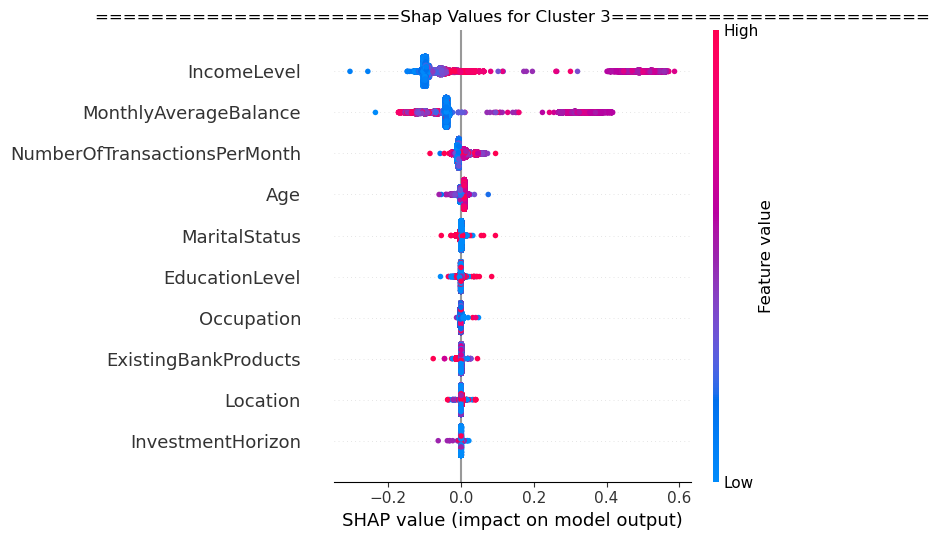

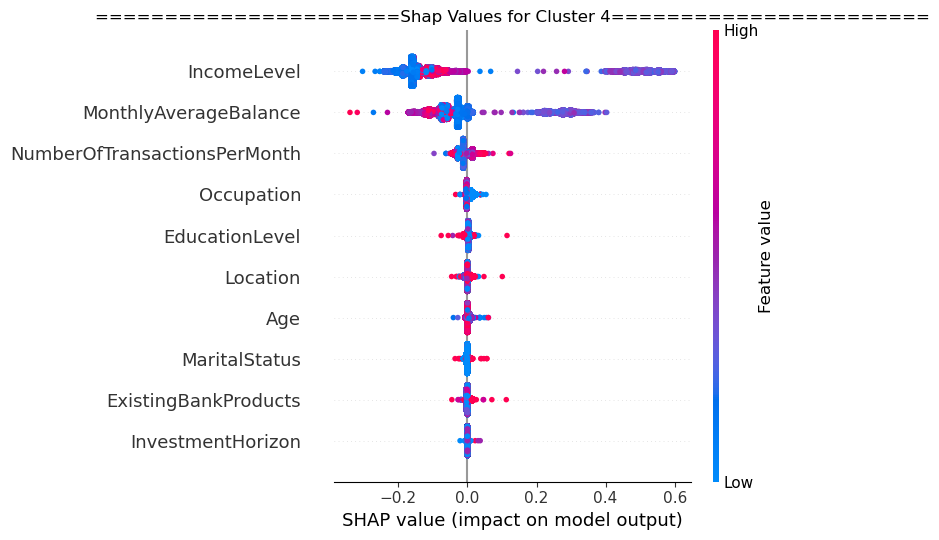

In [45]:
# ## SHAP Feature Importance
import shap
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest model to the data
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(df2, cluster_labels)

# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(df2)

# Plot SHAP summary plot
for cluster_indices, class_label in enumerate(['Cluster 1','Cluster 2','Cluster 3','Cluster 4']):
    plt.title(f'Shap Values for {class_label}'.center(70, '='))
    fig = shap.summary_plot(shap_values[:,:,cluster_indices], df2, feature_names=df2.columns)
    plt.show()
    print('\n')
    plt.close()

In [46]:
imputed_df['Clusters'] = cluster_labels

In [47]:
imputed_df

,MaritalStatus,EducationLevel,Occupation,Location,ExistingBankProducts,InvestmentHorizon,Age,IncomeLevel,MonthlyAverageBalance,NumberOfTransactionsPerMonth,Clusters
0,Single,Bachelor's,Student,Rural,Loan,Short-term,18.0,2919.0,2919.0,12.0,0
1,Married,High School,Retired,Rural,Credit Card,Mid-term,66.0,46672.0,46672.0,7.0,0
2,Married,Bachelor's,Salaried,Rural,FD,Long-term,45.0,186039.0,186039.0,13.0,2
3,Married,Bachelor's,Salaried,Metro,FD,Long-term,56.0,63927.0,63927.0,9.0,3
4,Married,High School,Retired,SemiUrban,FD,Long-term,66.0,34509.0,34509.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...
45890,Married,PhD,Salaried,Rural,FD,Long-term,35.0,201676.0,201676.0,18.0,2
45891,Married,Bachelor's,Salaried,Rural,SIP,Long-term,37.0,133460.0,133460.0,11.0,2
45892,Single,Bachelor's,Student,Rural,Credit Card,Mid-term,18.0,8299.0,8299.0,4.0,0
45893,Single,Master's,Salaried,Metro,SIP,Mid-term,33.0,176511.0,176511.0,9.0,2


In [48]:
imputed_df.groupby('Clusters')['ExistingBankProducts'].value_counts()

Clusters  ExistingBankProducts
0         FD                      12274
          SIP                      5563
          Loan                     3622
          Credit Card              3038
1         FD                       2943
          SIP                      1336
          Loan                      853
          Credit Card               698
2         FD                       3126
          SIP                      1443
          Loan                      941
          Credit Card               788
3         FD                       4657
          SIP                      2133
          Loan                     1366
          Credit Card              1114
Name: count, dtype: int64

### Cluster 0

In [49]:
cluster0 = imputed_df[imputed_df['Clusters'] == 0]

In [50]:
cluster0.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age               IncomeLevel         \
                           mean   min   max          mean    min   
ExistingBankProducts                                               
Credit Card           49.249177  18.0  74.0  32267.526756   11.0   
FD                    49.601748  18.0  87.0  32884.981482    6.0   
Loan                  49.440404  18.0  74.0  32869.681115  120.0   
SIP                   49.626846  18.0  74.0  32809.214658   23.0   

                                   MonthlyAverageBalance                       \
                               max                  mean    min           max   
ExistingBankProducts                                                            
Credit Card           63891.000000          32270.502351   11.0  63891.000000   
FD                    63892.000000          32901.489909    6.0  96432.857143   
Loan                  63885.000000          32873.581604  120.0  63885.000000   
SIP                   76845.285714          32826.945610   23.0  96272.428571   

                     NumberOfTransactionsPerMonth             
                                             mean  min   max  
ExistingBankProducts                                          
Credit Card                              6.321828  2.0  19.0  
FD                                       6.164669  2.0  20.0  
Loan                                     6.163998  2.0  19.0  
SIP                                      6.176318  2.0  19.0

### Cluster 1

In [51]:
cluster1 = imputed_df[imputed_df['Clusters'] == 1]

In [52]:
cluster1.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age                IncomeLevel            \
                           mean   min   max           mean       min   
ExistingBankProducts                                                   
Credit Card           39.707736  30.0  55.0  254035.014327   93423.0   
FD                    39.491238  30.0  49.0  253881.741420  207789.0   
Loan                  39.300117  30.0  49.0  253867.975381  207941.0   
SIP                   39.185629  30.0  49.0  254269.776198  207837.0   

                               MonthlyAverageBalance                 \
                           max                  mean            min   
ExistingBankProducts                                                  
Credit Card           299569.0         254451.630731  207980.000000   
FD                    299997.0         253881.741420  207789.000000   
Loan                  299568.0         253732.293921  180701.714286   
SIP                   299939.0         254169.153844  158043.142857   

                                NumberOfTransactionsPerMonth              
                            max                         mean   min   max  
ExistingBankProducts                                                      
Credit Card           384221.25                    14.548097   8.0  19.0  
FD                    299997.00                    14.466531  10.0  19.0  
Loan                  299568.00                    14.522191  10.0  19.0  
SIP                   384221.25                    14.499251  10.0  19.0

### Cluster 2

In [53]:
cluster2 = imputed_df[imputed_df['Clusters'] == 2]

In [54]:
cluster2.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age                IncomeLevel                 \
                           mean   min   max           mean            min   
ExistingBankProducts                                                        
Credit Card           42.706853  30.0  59.0  160958.196701  128428.000000   
FD                    42.579609  30.0  59.0  161643.276483   99271.285714   
Loan                  42.634431  30.0  59.0  162462.056627  128301.000000   
SIP                   42.602218  30.0  59.0  161552.768835  100508.428571   

                               MonthlyAverageBalance                           \
                           max                  mean            min       max   
ExistingBankProducts                                                            
Credit Card           207741.0         160882.860044  128428.000000  207741.0   
FD                    230535.0         161626.583722  128307.000000  248086.0   
Loan                  207766.0         162490.504782  128301.000000  222489.0   
SIP                   207627.0         161456.169191   98913.285714  207627.0   

                     NumberOfTransactionsPerMonth             
                                             mean  min   max  
ExistingBankProducts                                          
Credit Card                             11.531726  4.0  33.0  
FD                                      11.616763  4.0  33.0  
Loan                                    11.557917  4.0  19.0  
SIP                                     11.514306  4.0  19.0

### Cluster 3

In [55]:
cluster3 = imputed_df[imputed_df['Clusters'] == 3]

In [56]:
cluster3.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age               IncomeLevel           \
                           mean   min   max          mean      min   
ExistingBankProducts                                                 
Credit Card           42.411131  23.0  59.0  93818.755065  25577.0   
FD                    42.392988  23.0  71.0  94770.329795  27308.0   
Loan                  43.028551  23.0  59.0  95448.166388  63904.0   
SIP                   42.676914  23.0  59.0  95586.466479   4395.0   

                                    MonthlyAverageBalance                     \
                                max                  mean      min       max   
ExistingBankProducts                                                           
Credit Card           165997.857143          93827.550269   5279.0  131026.0   
FD                    128282.000000          94810.320378  47426.0  191156.0   
Loan                  128194.000000          95537.528969  62534.0  143466.0   
SIP                   128164.000000          95671.818565  63912.0  128164.0   

                     NumberOfTransactionsPerMonth             
                                             mean  min   max  
ExistingBankProducts                                          
Credit Card                              9.500000  3.0  19.0  
FD                                       9.788000  3.0  19.0  
Loan                                     9.493411  3.0  19.0  
SIP                                      9.604313  3.0  19.0

## For K = 3

In [57]:
# Choose the optimal number of clusters
optimal_clusters = 3

kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_model.fit(df2)
cluster_labels = kmeans_model.labels_

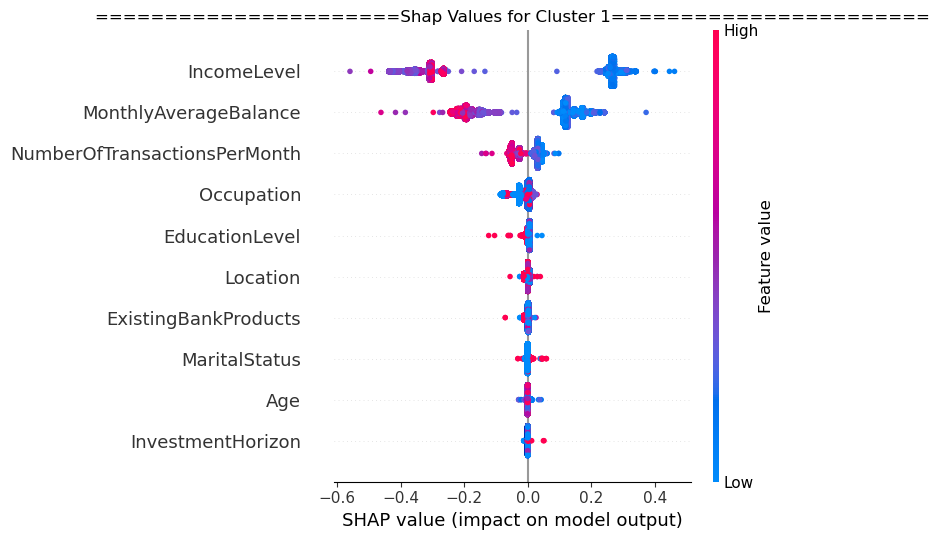

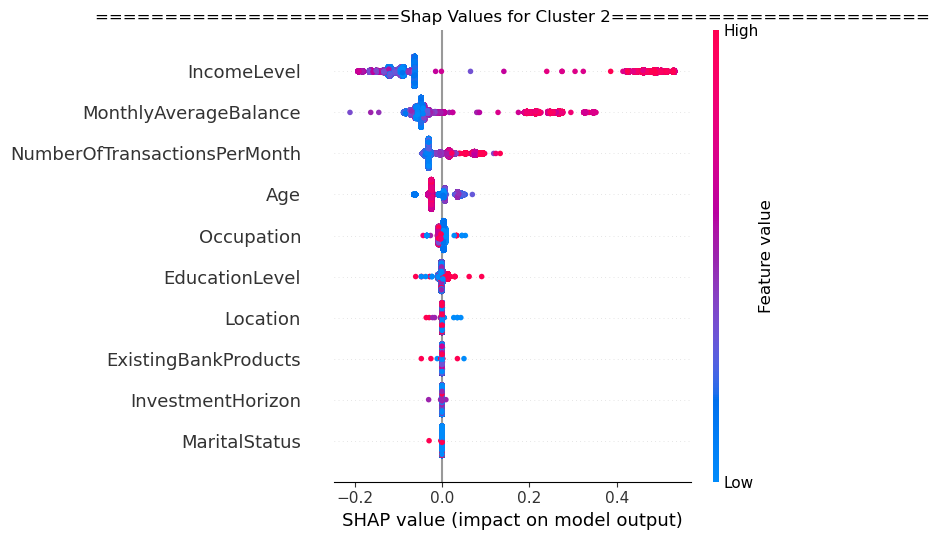

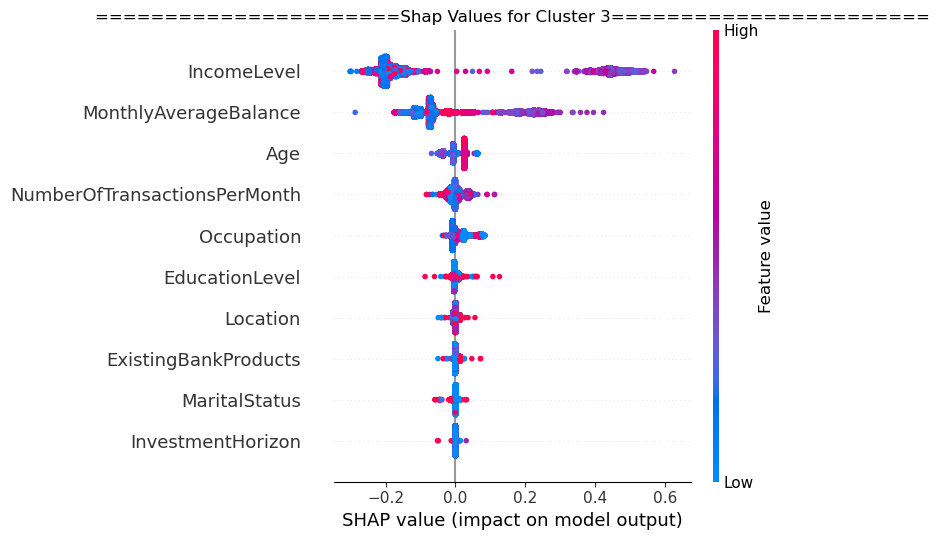

In [58]:
# ## SHAP Feature Importance
import shap
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest model to the data
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)
rf_model.fit(df2, cluster_labels)

# Calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(df2)

# Plot SHAP summary plot
for cluster_indices, class_label in enumerate(['Cluster 1','Cluster 2','Cluster 3']):
    plt.title(f'Shap Values for {class_label}'.center(70, '='))
    fig = shap.summary_plot(shap_values[:,:,cluster_indices], df2, feature_names=df2.columns)
    plt.show()
    print('\n')
    plt.close()

In [59]:
imputed_df['Clusters'] = cluster_labels

In [60]:
imputed_df.groupby('Clusters')['ExistingBankProducts'].value_counts()

Clusters  ExistingBankProducts
0         FD                      13137
          SIP                      5933
          Loan                     3863
          Credit Card              3296
1         FD                       3768
          SIP                      1723
          Loan                     1120
          Credit Card               899
2         FD                       6095
          SIP                      2819
          Loan                     1799
          Credit Card              1443
Name: count, dtype: int64

### Cluster 0

In [61]:
cluster0 = imputed_df[imputed_df['Clusters'] == 0]

In [62]:
cluster0.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age               IncomeLevel         \
                           mean   min   max          mean    min   
ExistingBankProducts                                               
Credit Card           48.587682  18.0  74.0  35240.050841   11.0   
FD                    48.923031  18.0  87.0  35369.541883    6.0   
Loan                  48.863356  18.0  74.0  35215.146666  120.0   
SIP                   49.057836  18.0  74.0  35153.544942   23.0   

                                   MonthlyAverageBalance         \
                               max                  mean    min   
ExistingBankProducts                                              
Credit Card           77201.000000          35262.534934   11.0   
FD                    77314.000000          35384.965833    6.0   
Loan                  85031.571429          35212.979956  120.0   
SIP                   77274.000000          35194.869567   23.0   

                                    NumberOfTransactionsPerMonth             
                                max                         mean  min   max  
ExistingBankProducts                                                         
Credit Card            93406.000000                     6.519938  2.0  19.0  
FD                     96432.857143                     6.369426  2.0  20.0  
Loan                   77304.000000                     6.340668  2.0  19.0  
SIP                   125159.714286                     6.345501  2.0  19.0

### Cluster 1

In [63]:
cluster1 = imputed_df[imputed_df['Clusters'] == 1]

In [64]:
cluster1.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age                IncomeLevel                 \
                           mean   min   max           mean            min   
ExistingBankProducts                                                        
Credit Card           39.678532  30.0  55.0  240569.393771   93423.000000   
FD                    39.440590  30.0  49.0  240660.736200  179981.000000   
Loan                  39.368750  30.0  49.0  239614.059311  167949.428571   
SIP                   39.236796  30.0  49.0  240739.574579  180244.000000   

                               MonthlyAverageBalance                 \
                           max                  mean            min   
ExistingBankProducts                                                  
Credit Card           299569.0         240892.862347  180145.000000   
FD                    299997.0         240636.149719  137893.142857   
Loan                  299568.0         239559.419388  180153.000000   
SIP                   299939.0         240661.552836  158043.142857   

                                NumberOfTransactionsPerMonth             
                            max                         mean  min   max  
ExistingBankProducts                                                     
Credit Card           384221.25                    14.229779  8.0  19.0  
FD                    299997.00                    14.154459  8.0  33.0  
Loan                  299568.00                    14.194133  8.0  19.0  
SIP                   384221.25                    14.176934  8.0  19.0

### Cluster 2

In [65]:
cluster2 = imputed_df[imputed_df['Clusters'] == 2]

In [66]:
cluster2.groupby('ExistingBankProducts').agg({'Age': ['mean', 'min', 'max'],
                                              'IncomeLevel': ['mean', 'min', 'max'],
                                              'MonthlyAverageBalance': ['mean', 'min', 'max'],
                                              'NumberOfTransactionsPerMonth': ['mean', 'min', 'max']})

Age                IncomeLevel                     \
                           mean   min   max           mean      min       max   
ExistingBankProducts                                                            
Credit Card           43.255717  23.0  59.0  120770.094149  25577.0  195752.0   
FD                    43.354975  23.0  71.0  119111.929474  27308.0  191764.0   
Loan                  43.713174  23.0  59.0  119209.839117  77450.0  179933.0   
SIP                   43.372067  23.0  59.0  119144.516293  67303.0  204274.0   

                     MonthlyAverageBalance                     \
                                      mean      min       max   
ExistingBankProducts                                            
Credit Card                  120690.651916   5279.0  179899.0   
FD                           119149.123310  47426.0  248086.0   
Loan                         119274.762408  77450.0  179933.0   
SIP                          119107.666700  77369.0  179926.0   

                     NumberOfTransactionsPerMonth             
                                             mean  min   max  
ExistingBankProducts                                          
Credit Card                             10.220374  3.0  33.0  
FD                                      10.357295  3.0  19.0  
Loan                                    10.097832  3.0  19.0  
SIP                                     10.200882  3.0  19.0